In [1]:
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.ticker
import numpy as np

In [2]:
data = pd.read_csv("dataset1_dirty.csv") 

In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State gov,77516,Bachelors,13,Never-married,dmclrical,Not-in-family,White,Male,0,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlerscleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,private,338409,Bachelors,13,Married-civ-spouse,Profspecialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data['id'] = data.index

In [12]:
# https://stackoverflow.com/questions/11264521/date-ticks-and-rotation-in-matplotlib
def plotGraph(columnName):
  cate = data.groupby(columnName)['id'].nunique()
  xLabels = []
  values = []
  for index, val in cate.iteritems():
    xLabels.append(index)
    values.append(val)
  plotData = pd.DataFrame({columnName: xLabels, 'count': values})
  if columnName == 'fnlwgt'or columnName == 'capital-loss':
    fnlWgtGrouping(columnName)
  else:
    if(data[columnName].dtypes == 'O'):
      sb.set(rc={'figure.figsize':(len(xLabels)*1.25,10.5)})
      ax = sb.barplot(x = columnName,  y = 'count', 
                      data = plotData, 
                      color = 'orange'
                    )
      ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1500))

      ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
    else:
      sb.set(rc={'figure.figsize':(25,10.5)})
      ax = sb.barplot(x = columnName, y = 'count', 
                      data = plotData, 
                      color = 'orange'
                     )
      ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
      plt.show()

In [13]:
def fnlWgtGrouping(columnName):
  groupedColumn = columnName + "_group"
  data[groupedColumn] = pd.cut(data[columnName],20, include_lowest=True)
  plotGraph(groupedColumn)

In [14]:
for column in data.columns:
    plotGraph(column)


Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary', 'id', 'fnlwgt_group', 'capital-loss_group'],
      dtype='object')

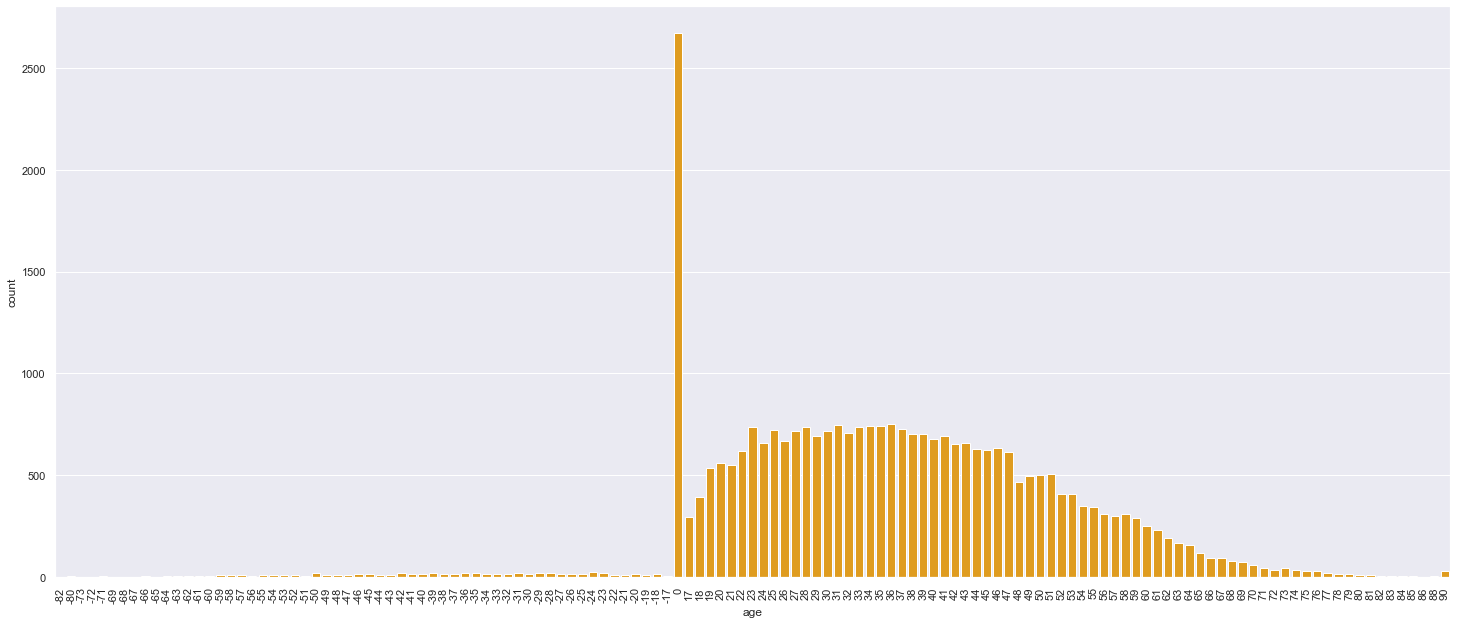

In [15]:
plotGraph('age')

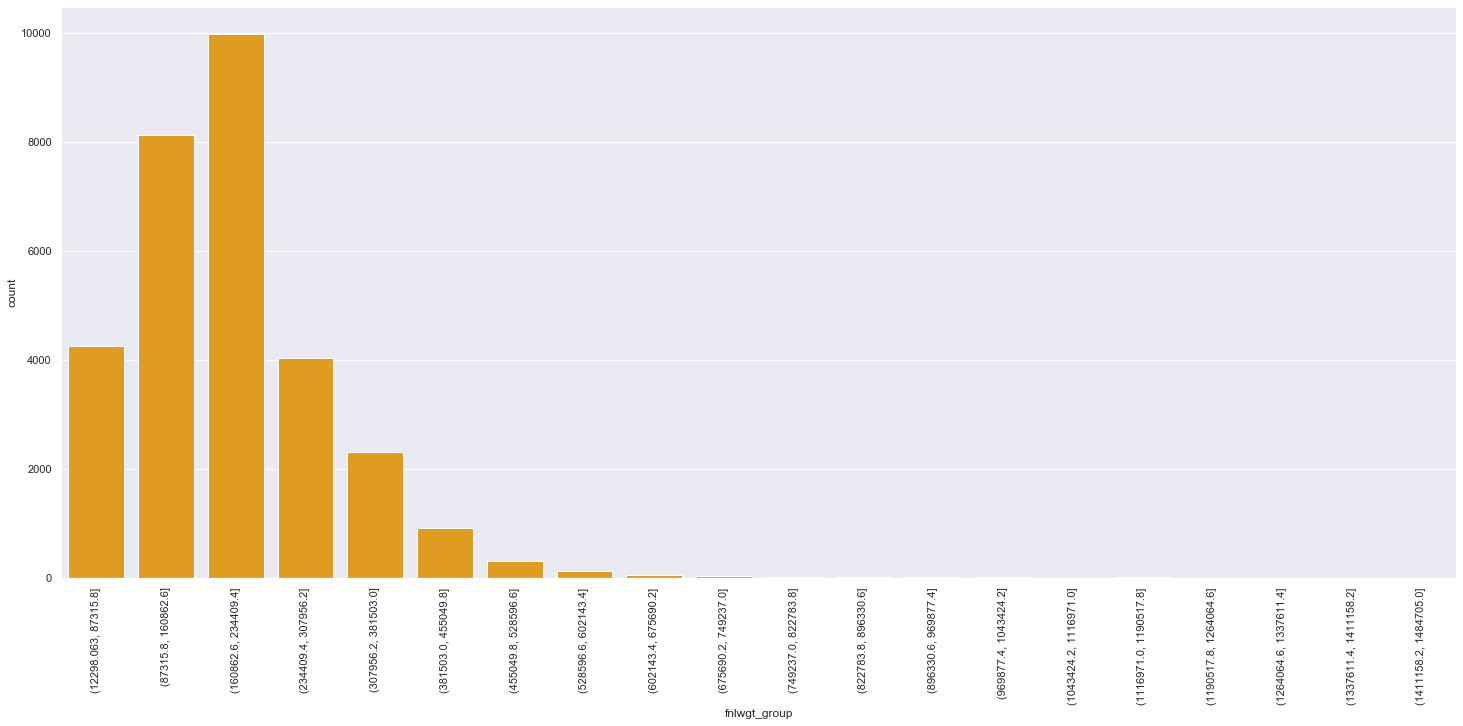

In [9]:
plotGraph('fnlwgt')

In [ ]:
#education,education-num,

In [ ]:
plotGraph('education')

In [ ]:
plotGraph('marital-status') 

In [ ]:
plotGraph('occupation') 


In [ ]:
plotGraph('relationship')


In [ ]:
plotGraph('race')


In [ ]:
plotGraph('sex')


In [ ]:
plotGraph('capital-gain')

In [ ]:
plotGraph('capital-loss')

Processing column ***AGE***

In [ ]:
plotGraph('hours-per-week')

In [ ]:
plotGraph('native-country')

In [ ]:
plotGraph('salary')

In [ ]:
process_data = pd.DataFrame()
process_data['sex'] = data['sex']
process_data['race'] = data['race']
process_data['marital-status'] = data['marital-status']
process_data['hours-per-week'] = data['hours-per-week']
process_data['native-country'] = data['native-country']
process_data['fnlwgt'] = data['fnlwgt']
process_data['education'] = data['education']
process_data['relationship'] = data['relationship']
process_data['capital-loss'] = data['capital-loss']


 

In [ ]:
process_data['age'] = data['age'].where(data['age'] >= 0, 'unknown')

In [ ]:
process_data

Processing Column **workclass**

In [ ]:
data['workclass'].unique()

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.replace.html
import re 
workClassValues = ['Private', 'Federal-gov', 'Local-gov', 'State-gov', 'Without-pay', 'Never-worked','Self-emp-inc','Self-emp-not-inc']
checkDic = {}
checkDic['Self-emp-not-inc'] = 'Self-emp-not inc|Self emp-not-inc|Self-emp-notinc|Selfemp-not-inc|Self empnot-inc|Self emp-not inc|Selfemp-not- nc|Selfemp- ot-inc|Selfemp-ot-inc|Self emp not-inc|Self emp-notinc|Selfemp-ot-ic|Selfemp-not-nc|Selfemp- ot-nc|Self empnot- nc|Selfemp-ot-i c|selfemp-not-inc|selfemp-not-nc|self-emp-not-inc|Self-emp not-inc|Self-empnot- nc|Self-empnot-nc|self-emp not-inc|selfemp- ot-inc|self-emp-notinc|self-emp-not inc|Self-emp not inc|Self-emp notinc|self-empnot-inc|self emp-not-inc|selfemp-ot-inc|self-emp notinc|selfemp-not- nc|self emp not-inc|self-emp not inc|Self-empnot-inc'
checkDic['Private'] = 'Private|private'
checkDic['Self-emp-inc'] = 'Self emp inc|Self emp-inc|Self empinc|Selfemp- nc|Selfemp-inc|Selfemp-nc|Self-emp inc|selfemp-inc|Self-empinc|self emp-inc|self-emp inc|self-empinc|self emp inc|self-emp-inc'
checkDic['Federal-gov'] = 'Federal gov|Federalgov|Federal-gov|federal gov|federal-gov|federalgov'
checkDic['Local-gov'] = 'Localgov|Local-gov|Local gov|local gov|localgov|local-gov'
checkDic['State-gov'] = 'State-gov|Stategov|State gov|state gov|stategov|state gov|state-gov'
checkDic['Without-gov'] = 'Without-gov|Withoutgov|Without gov|without gov|without-gov|withoutgov'
checkDic['Never-worked'] = 'Neverworked|Never worked|Never-worked'
checkDic['Without-pay'] = 'Without-pay|Withoutpay|Without pay|without-pay|without pay|withoutpay'


for index in range(len(workClassValues)):
  data['workclass'] = pd.Series(data['workclass'].str.replace(checkDic[workClassValues[index]], workClassValues[index], regex=True))

process_data['workclass'] = data['workclass'] 

In [ ]:
plotGraph('workclass')

Processing Column **Occupation**

In [ ]:
data['occupation'].unique()

In [ ]:
occupationValues = ['Tech-support','Transport-moving','Adm-clerical','Exec-managerial','Handlers-cleaners','Sales','Farming-fishing','Machine-op-inspct','Other-service','Prof-specialty','Craft-repair','Armed-Forces']
checkDic = {}
checkDic['Tech-support'] = '^Tec.*[ort]*$|^tec.*[ort]*$|^[T|t]*[ec].*[ort]*$'
checkDic['Transport-moving'] = '^Tra.*[ing]*$|^tra*.*[ing]*$|^[T|t]*[ra].*[ing]*$'
checkDic['Adm-clerical'] ='^Adm.*[cal]*$|^adm*.*[cal]*$|^[A|a]*[dm].*[ing]*$'
checkDic['Exec-managerial'] = '^Exec.*[ial]*$|^exec*.*[ial]*$|^[E|e]*[xec].*[ial]*$'
checkDic['Handlers-cleaners'] = '^Hand.*[ers]*$|^hand*.*[ers]*$|^[H|h]*[and].*[ers]*$' 
checkDic['Sales'] ='^[Sa|sa]+.*[les]*$'
checkDic['Farming-fishing'] ='^Far.*[ing]*$|^far*.*[ing]*$|^[F|f]*[ar].*[ing]*$'
checkDic['Machine-op-inspct'] = '^Mac.*[pct]*$|^mac*.*[pct]*$|^[M|m]*[ac].*[pct]*$'
checkDic['Other-service'] = '^Oth.*[ice]*$|^oth*.*[ice]*$|^[O|o]*[th].*[ice]*$'
checkDic['Prof-specialty'] = 'Pro.*[lty]*$|^pro*.*[lty]*$|^[P|p]*[ro].*[lty]*$'
checkDic['Craft-repair']  = '^Cra.*[air]*$|^cra*.*[air]*$|^[C|c]*[ra].*[air]*$'
checkDic['Armed-Forces']  = '^Arm.*[ces]*$|^arm*.*[ces]*$|^[A|a]*[rm].*[ces]*$'
for index in range(len(occupationValues)):
  data['occupation'] = pd.Series(data['occupation'].str.replace(checkDic[occupationValues[index]], occupationValues[index], regex=True))

process_data['occupation'] = data['occupation']

In [ ]:
plotGraph('occupation')

Processing education number

In [ ]:
educationClass= ['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th','Bachelors','HS-grad','Masters','Doctorate','Some-college','Prof-school','Assoc-acdm','Assoc-voc']

In [ ]:

for i in range(len(educationClass)):
  data.loc[data['education'] == educationClass[i] , 'num'] = i+1

data['num']=data['num'].astype(int)
process_data['education-num'] = data['num']

In [ ]:
data['salary'] = data['salary'].replace('?', 'unknown')
process_data['salary'] = data['salary']

In [ ]:
process_data.head()